In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import sympy as sy

- Calculate the following integral:

$$\int_1^3 \sqrt{x} dx = \frac{2}{3} x^{3/2} |_{1}^{3} = \frac{2}{3} 3^{3/2} - \frac{2}{3} 1^{3/2} = 2.7974$$

In [2]:
x = sy.Symbol('x')
expr = sy.sqrt(x)
sy.pprint(expr)  # f(x)
sy.pprint(sy.integrate(expr, x))  # int f(x) dx
sy.integrate(expr, (x, 1, 3)).evalf()  # evaluating between 1 and 3

√x
   3/2
2⋅x   
──────
  3   


2.79743494847109

### Graph the function in Python

- Think on how you draw a plot on a graph paper

![](https://mathbits.com/MathBits/StudentResources/GraphPaper/quadone.gif)

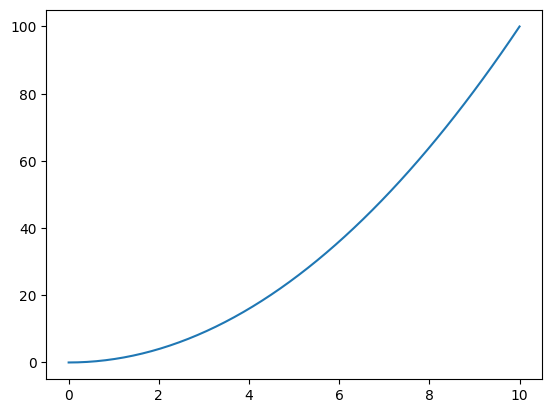

In [3]:
x = np.linspace(0, 10)
plt.plot(x, x**2)

### Monte Carlo: Sampling method

(2.7901073963112, 2.8341765920749435)

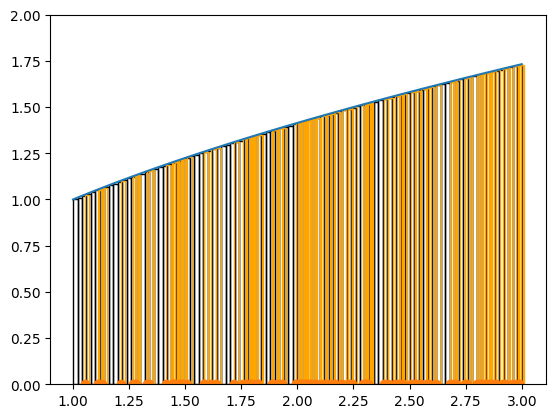

In [4]:
# Function to evaluate
def f(x):
    return np.sqrt(x);  # evaluamos fx=x^(1/2)

# Integral limits
a, b = 1, 3

rn = 100  # number of rectangles

x = np.linspace(a, b, rn+1)

width = (b - a) / (rn)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.set_ylim(0, 2)

rectangles = x.copy()
r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f(rectangles[:-1]))]
x, x[:-1], x[1:]
xr = np.random.random(rn)*(b-a) + a
ax.plot(xr, [0]*(rn), 'o')
rectangles = xr.copy()
ra = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='orange'))
             for xy in zip(rectangles, f(rectangles))]

Area_rs = width*f(x[:-1]).sum()
# Sampling method
Area_mc = width*f(xr[:-1]).sum()
Area_rs, Area_mc

### Monte Carlo: Hit and miss method

(2.8084, 10000)

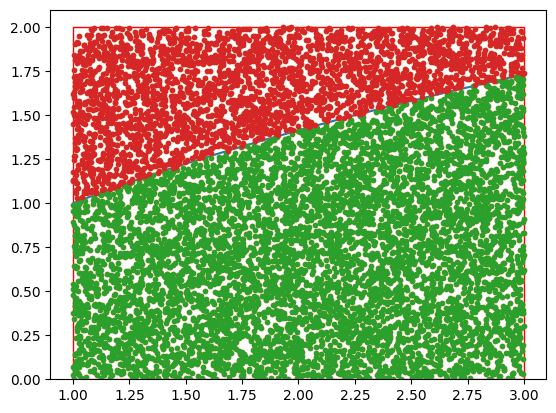

In [10]:
a, b = 1, 3
c = 2

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.set_ylim(0, c + 0.1)


ax.add_patch(Rectangle((a, 0), b-a, c, facecolor='none', edgecolor='red'))

points = 10000
xr = np.random.random(points)*(b-a) + a
yr = np.random.random(points)*c

inside = np.where(f(xr) > yr)[0]
outside = np.where(f(xr) < yr)[0]
ax.plot(xr, yr, '.')
known_area = (b - a) * c  # Square/rectangle
area_hm = len(inside) / points * known_area

ax.plot(xr[inside], yr[inside], '.')
ax.plot(xr[outside], yr[outside], '.')

area_hm, len(inside)+len(outside)

### Appendix: Numerical Integration

- See: https://www.zweigmedia.com/RealWorld/integral/numint.html

Mid point: 2.7996110197299453
Left sum: 2.610048631924437
Right sum: 2.9760740357088755


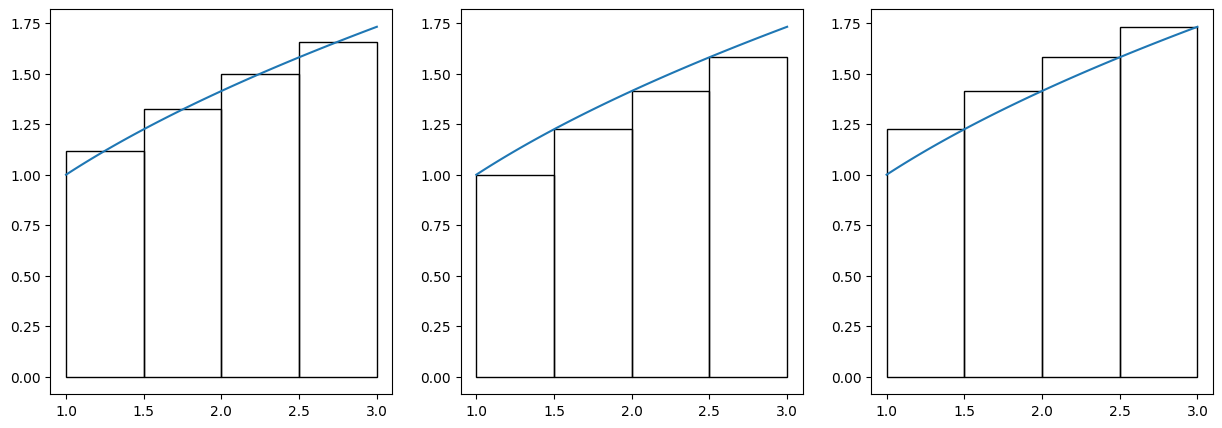

In [6]:
def riemann_sum(f, a, b, rn=10, method='mid', ax=None):
    
    if ax is None: fig, ax = plt.subplots()
    
    x = np.linspace(a, b, 100)  # Rango para la variable x
    fx = f(x)  # Evaluamos f(x)
    ax.plot(x, fx)  # Graficamos x, fx
    width = (b - a) / (rn)
    rectangles = np.linspace(a, b, rn+1)

    if method == 'mid':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f((rectangles[:-1]+rectangles[1:])/2))]
        print("Mid point:", f((rectangles[:-1]+rectangles[1:])/2).sum()*width)
    if method == 'left':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f(rectangles[:-1]))]
        print("Left sum:", f(rectangles[:-1]).sum()*width)
    if method == 'right':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f(rectangles[1:]))]
        print("Right sum:", f(rectangles[1:]).sum()*width)

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15,5))
method = ['mid', 'left', 'right']
rs = [riemann_sum(f, 1, 3, rn=4, method=m, ax=ax[i]) for i, m in enumerate(method)]

### Monte Carlo Integration

- Check the slides in UDLA Brightspace

### Some extra examples of simulating probability and randomness

1. What is the probability of a 1D random walk returning to the origin.

2. A certain family has 6 children, consisting of 3 boys and 3 girls. Assuming that all
birth orders are equally likely, what is the probability that the 3 eldest children are the
3 girls?

3. A city with 6 districts has 6 robberies in a particular week. Assume the robberies are
located randomly, with all possibilities for which robbery occurred where equally likely.
What is the probability that some district had more than 1 robbery?

4. Tyrion, Cersei, and ten other people are sitting at a round table, with their seating
arrangement having been randomly assigned. What is the probability that Tyrion and
Cersei are sitting next to each other?


([<matplotlib.lines.Line2D at 0x7f7e21a25250>], 96)

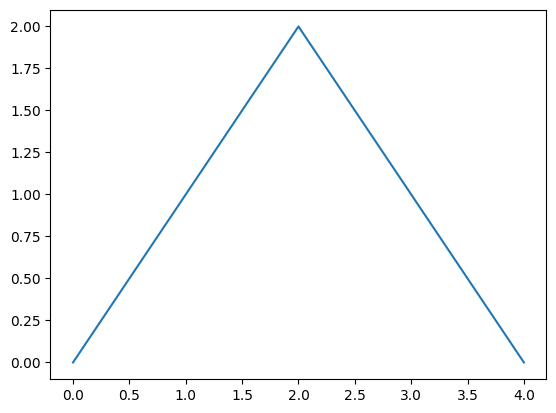

In [24]:
# Write code here

steps = 1000

origin = 0

simulations = 100
got_back = 0
for i in range(simulations):
    walk = [origin]
    for i in range(steps):
        walk += [walk[-1] + np.random.randint(2)*2-1]
        if walk[-1] == 0:
            got_back += 1
            break

plt.plot(walk), got_back

In [15]:
walk

[0, -1, 0, 1, 0, 1, 2, 1, 2, 1, 0]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>